In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Tue Dec  8 05:20:13 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    24W / 300W |     10MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install --upgrade transformers


     |████████████████████████████████| 1.4MB 13.6MB/s 
     |████████████████████████████████| 2.9MB 57.3MB/s 
     |████████████████████████████████| 890kB 33.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=476fb464c258115cba13890df1b19a5df87c32c6df82fec154baf01a7573923a
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
pip install simpletransformers

     |████████████████████████████████| 225kB 13.8MB/s 
     |████████████████████████████████| 1.8MB 21.5MB/s 
     |████████████████████████████████| 7.4MB 60.8MB/s 
     |████████████████████████████████| 317kB 70.7MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 71kB 9.6MB/s 
     |████████████████████████████████| 133kB 56.2MB/s 
     |████████████████████████████████| 102kB 12.8MB/s 
     |████████████████████████████████| 102kB 12.5MB/s 
     |████████████████████████████████| 163kB 69.8MB/s 
     |████████████████████████████████| 112kB 64.7MB/s 
     |████████████████████████████████| 4.5MB 60.2MB/s 
     |████████████████████████████████| 71kB 9.2MB/s 
     |████████████████████████████████| 122kB 45.1MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-cp36-none-any.whl size=16171 sha256=49c3f7d0a8d02113b5101af940f1a577dc5f843acec8bde95bdbbf40b7cabce4
  Stored in directory: /root/.cache/pip/wheels/52/df/1b/45d75646c3742

In [ ]:
%cd /content/drive/Shared drives/CS594 DNLP Project/

/content/drive/Shared drives/CS594 DNLP Project


In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from hyperopt import fmin, tpe, hp

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# from datasets import load_metric

# metric = load_metric("bertscore")

In [ ]:
!pip install py-rouge

     |████████████████████████████████| 61kB 6.6MB/s 


In [ ]:
import rouge

In [ ]:
import logging
import pandas as pd
from sklearn.model_selection import train_test_split
from simpletransformers.seq2seq import Seq2SeqModel, Seq2SeqArgs

In [ ]:
# !pip install -U git+https://github.com/davebulaval/bert_score.git@master

!pip install bert_score


     |████████████████████████████████| 61kB 6.2MB/s 


In [ ]:
# pip install datasets

In [ ]:
import pandas as pd
import os
import numpy as np

In [ ]:
from bert_score import score

### Loading Data 

In [ ]:
data_path = r'/content/drive/Shared drives/CS594 DNLP Project/Data/Data 2_2'

In [ ]:
train_df = pd.read_csv(os.path.join(data_path, '2_2 Training data.csv'), usecols= [1,2], names = ['input_text', 'target_text'], header  = 0).dropna()
train_df.head()

,input_text,target_text
0,the july deadline to begin withdrawing troops ...,lindsey withdrawl should only begin when condi...
1,libyan military aircraft crashed wednesday sou...,pilot and eject before the newspaper reports
2,south korea beat fellow world cup finalists iv...,south korea beat ivory coast in friendly inter...
3,sensing an imminent the government recognized ...,ouattara forces say they control
4,top official has criticized claim that the six...,official denies iran claim that six of its lea...


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9995 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   input_text   9995 non-null   object
 1   target_text  9995 non-null   object
dtypes: object(2)
memory usage: 234.3+ KB


In [ ]:
# val_df = pd.read_csv(os.path.join(data_path, '2_2 Validation data.csv'), usecols= [1,2], names = ['input_text', 'target_text'], header  = 0).dropna()
# val_df.head()

In [ ]:
test_df = pd.read_csv(os.path.join(data_path, '2_2 Test data.csv'), usecols= [1,2], names = ['input_text', 'target_text'], header  = 0).dropna()
test_df.head()

,input_text,target_text
0,the painter zao once told me that painting exp...,painter zao died tuesday at age
1,louisiana justice of the peace who drew critic...,keith bardwell resigns in person at louisiana ...
2,if you are coffee lover you might be tempted t...,kopi luwak is the most expensive coffee
3,former new orleans mayor ray who captured the ...,ray family allegedly received hawaii jamaica trip
4,wait until friday to check out the latest inst...,the beginning of the new movie is currently av...


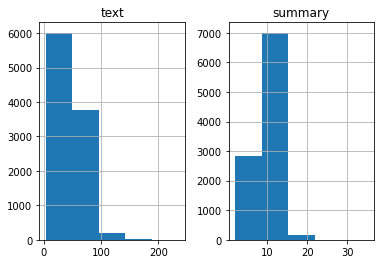

In [ ]:
text_count = []
summary_count = []

for t in train_df['input_text']:
    text_count.append(len(t.split()))
for t in train_df['target_text']:
    summary_count.append(len(t.split()))

graph_df= pd.DataFrame()
graph_df['text']=text_count
graph_df['summary']=summary_count

graph_df.hist(bins = 5)
plt.show()

In [ ]:
#Check how much % of text have 0-925 words
cnt=0
for i in train_df['input_text']:
    if(len(i.split())<=80):
        cnt=cnt+1
print(cnt/len(train_df['input_text']))

0.9456728364182091


In [ ]:
#Check how much % of summary have 0-50 words
cnt=0
for i in train_df['target_text']:
    if(0 <= len(i.split())<=15):
        cnt=cnt+1
print(cnt/len(train_df['target_text']))

0.9829914957478739


In [ ]:
max_seq_length = 80
max_length = 15

### Building Transformers models

In [ ]:
def model_transformers(epochs, train_batch_size,eval_batch_size,max_seq_length,max_length,repetition_penalty):
  model_args = Seq2SeqArgs()
  model_args.num_train_epochs = epochs
  model_args.no_save = True
  model_args.evaluate_generated_text = True
  model_args.evaluate_during_training = False
  model_args.evaluate_during_training_verbose = False
  model_args.overwrite_output_dir = True
  model_args.train_batch_size = train_batch_size
  model_args.eval_batch_size = eval_batch_size
  model_args.max_seq_length = max_seq_length
  model_args.max_length = max_length
  model_args.early_stopping = False
  model_args.do_sample = True
  model_args.repetition_penalty = repetition_penalty


  model = Seq2SeqModel(
  encoder_decoder_type='bart',
  encoder_decoder_name='facebook/bart-large-cnn',
  args=model_args,
  use_cuda=True,
  )
  return model

## Evaluation Metric

### The following code is adapted from https://pypi.org/project/py-rouge/

In [ ]:
def rouge_eval(x,y):
  evaluator = rouge.Rouge(metrics=['rouge-n', 'rouge-l', 'rouge-w'],
                          max_n=2,
                          limit_length=True,
                          length_limit=100,
                          length_limit_type='words',
                          apply_avg=True,
                          # apply_best=apply_best,
                          alpha=0.5, # Default F1_score
                          weight_factor=1.2,
                          stemming=True)
  scores  = evaluator.get_scores(x,y)
  return [scores['rouge-1']['f'], scores['rouge-2']['f'], scores['rouge-l']['f'], scores['rouge-w']['f']]


In [ ]:
def rouge_eval2(x,y):
  evaluator = rouge.Rouge(metrics=['rouge-n', 'rouge-l', 'rouge-w'],
                          max_n=2,
                          limit_length=True,
                          length_limit=100,
                          length_limit_type='words',
                          apply_avg=True,
                          # apply_best=apply_best,
                          alpha=0.5, # Default F1_score
                          weight_factor=1.2,
                          stemming=True)
  scores  = evaluator.get_scores(x,y)
  return np.sum([scores['rouge-1']['f'], scores['rouge-2']['f'], scores['rouge-l']['f'], scores['rouge-w']['f']])


In [ ]:
def bert_score(x,y):
  # print(x)
  # print(y)
  F1 = score(y,x, lang="en", verbose=False)[2]
  return F1

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
x = torch.tensor([3,5])
print(x.numpy().mean())
x

4.0


tensor([3, 5])

## Predicting the summaries of the test dataset

In [ ]:
{'repetition_penalty': 1.112}
best_bert= 0.8545945882797241

In [ ]:
# print(dadafd)

In [ ]:
repetition_penalty = 1.112
par_dict = {'max_length': max_length, 'max_seq_length': max_seq_length, 'repetition_penalty': repetition_penalty}
print(par_dict)

model = model_transformers(10, 32,16,max_seq_length,max_length,repetition_penalty)
model.train_model(train_df)
# eval_score = model.eval_model(val_df, output_dir=None, verbose=False, silent=True, bertscore = bert_score)['bertscore']
# print(eval_score)

{'max_length': 15, 'max_seq_length': 80, 'repetition_penalty': 1.112}


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


(3130, 1.1049948362401498)

In [ ]:
y_pred  = model.predict(test_df['input_text'])

In [ ]:
y_pred[0]

'chin was one of the foremost chinese painters of the century dies'

In [ ]:
score(y_pred, list(test_df['target_text']), lang="en", verbose=True)[2].numpy().mean()


calculating scores...
computing bert embedding.



computing greedy matching.



done in 2.89 seconds, 345.69 sentences/sec


0.8517338

In [ ]:
# y_pred[:1]

In [ ]:
# list(val_df['target_text'])[:1]

In [ ]:
# rouge_eval(y_pred[:2],list(val_df['target_text'])[:2])

In [ ]:
rouge_eval(y_pred,list(test_df['target_text']))

[0.19938696395884237,
 0.06141523292077107,
 0.21998370728726485,
 0.12818978587843594]

In [ ]:
pred_path = r'/content/drive/Shared drives/CS594 DNLP Project/Predictions/2/Test'

In [ ]:
def pred_save(filename, y_pred):
  pred_df = pd.DataFrame()
  pred_df['Actual Summary'] = test_df['target_text']
  pred_df['Predicted Summary'] = y_pred
  pred_df.to_csv(os.path.join(pred_path,filename))

In [ ]:
pred_save('Test predicitions 2 bertscore repp 1.112 .csv', y_pred)

In [ ]:
# def objective_func_TRA(args):

#   repetition_penalty = args['repetition_penalty']

#   par_dict = {'repetition_penalty': repetition_penalty}
#   print(par_dict)

#   model = model_transformers(10, 32,16,max_seq_length,max_length,repetition_penalty)
#   model.train_model(train_df)
#   eval_score = (model.eval_model(val_df, output_dir=None, verbose=False, silent=True, bertscore = bert_score)['bertscore']).numpy().mean()
#   print(eval_score)

#   return -(eval_score)

# space = {'repetition_penalty': hp.uniform('repetition_penalty',1, 4)
#         }                  
                                                                 
# best_TRA = fmin(objective_func_TRA, space, algo=tpe.suggest, max_evals=4)
# print(best_TRA)

{'repetition_penalty': 1.9936376697246616}
  0%|          | 0/4 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)



Exception ignored in: 
<bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fbb390ba9e8>>
Traceback (most recent call last):

  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1203, in __del__

self._shutdown_workers()
Exception ignored in: 
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1177, in _shutdown_workers

<bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fbb390ba9e8>>
Traceback (most recent call last):

w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1203, in __del__

  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join

self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1177, in _shutdown_

0.8532573
{'repetition_penalty': 1.1121876273942704}
 25%|██▌       | 1/4 [18:05<54:16, 1085.52s/it, best loss: -0.8532572984695435]

0.8545946
{'repetition_penalty': 3.048676772021243}
 50%|█████     | 2/4 [36:31<36:23, 1091.74s/it, best loss: -0.8545945882797241]

Exception ignored in: 
<bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fbb32289710>>
Traceback (most recent call last):

  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1203, in __del__

self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1177, in _shutdown_workers

w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join

assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError
Exception ignored in: 
: 
<bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fbb32289710>>
Traceback (most recent call last):

  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1203, in __del__

can only join a child process
self._shu

Exception ignored in: 
<bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fbb397b0f60>>
Traceback (most recent call last):

  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1203, in __del__

self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1177, in _shutdown_workers

w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join

Exception ignored in: 
assert self._parent_pid == os.getpid(), 'can only join a child process'
<bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fbb397b0f60>>
Traceback (most recent call last):

AssertionError
: 
can only join a child process
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1203, in __del__

self._shu

0.85429543
{'repetition_penalty': 1.800569020947174}
 75%|███████▌  | 3/4 [54:14<18:03, 1083.01s/it, best loss: -0.8545945882797241]

0.8533296
100%|██████████| 4/4 [1:12:57<00:00, 1094.36s/it, best loss: -0.8545945882797241]
{'repetition_penalty': 1.1121876273942704}


In [ ]:
# def objective_func_TRA(args):

#   max_seq_length = args['max_seq_length']
#   max_length = args['max_length']
#   repetition_penalty = args['repetition_penalty']

#   par_dict = {'max_length': max_length, 'max_seq_length': max_seq_length, 'repetition_penalty': repetition_penalty}
#   print(par_dict)

#   model = model_transformers(10, 32,16,max_seq_length,max_length,repetition_penalty)
#   model.train_model(train_df)
#   eval_score = (model.eval_model(val_df, output_dir=None, verbose=False, silent=True, bertscore = bert_score)['bertscore']).numpy().mean()
#   print(eval_score)

#   return -(eval_score)

# space = {'max_length': hp.choice('max_length',[10,20,30]),  
#          'max_seq_length': hp.choice('max_seq_length',[20,40, 60, 80]),
#          'repetition_penalty': hp.uniform('repetition_penalty',1, 4)
#         }                  
                                                                 
# best_TRA = fmin(objective_func_TRA, space, algo=tpe.suggest, max_evals=10)
# print(best_TRA)